In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *

In [6]:
from fastai.vision.all import *
Path.BASE_PATH = path
path = untar_data(URLs.PETS)

In [7]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [8]:
(path/"images").ls()

(#7393) [Path('images/Abyssinian_1.jpg'),Path('images/Abyssinian_10.jpg'),Path('images/Abyssinian_100.jpg'),Path('images/Abyssinian_100.mat'),Path('images/Abyssinian_101.jpg'),Path('images/Abyssinian_101.mat'),Path('images/Abyssinian_102.jpg'),Path('images/Abyssinian_102.mat'),Path('images/Abyssinian_103.jpg'),Path('images/Abyssinian_104.jpg')...]

In [9]:
fname = (path/"images").ls()[0]

In [10]:
fname

Path('images/Abyssinian_1.jpg')

In [12]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Abyssinian']

In [13]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items=get_image_files, splitter=RandomSplitter(seed=42),
                get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

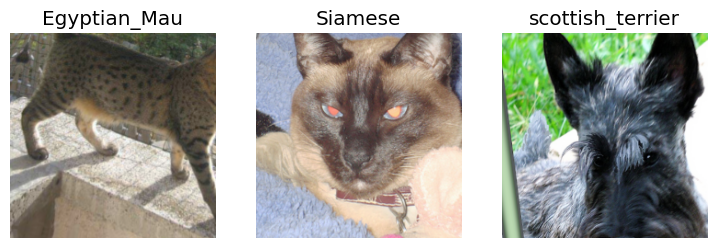

In [15]:
dls.show_batch(nrows=1, ncols=3)

In [17]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items = get_image_files, splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\YES\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      C:\Users\YES\.fastai\data\oxford-iiit-pet\images\saint_bernard_138.jpg
    applying partial gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(30))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fal

In [18]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

C:\Users\YES\anaconda3\lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\Users\YES\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\YES\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.486777,0.312017,0.095399,09:37


epoch,train_loss,valid_loss,error_rate,time
0,0.505466,0.295902,0.086604,12:11
1,0.328083,0.218725,0.066306,12:18


In [19]:
x, y = dls.one_batch()

In [20]:
y

TensorCategory([14,  3, 18, 34, 36, 22,  9,  2,  8, 11, 23,  2, 23, 22,  8,  6, 15, 26, 35, 16,  9, 30, 13, 11, 14,  1, 18, 17, 23,  6, 28, 24, 17, 29, 31,  5, 26,  6, 36,  2, 25, 25, 11, 16,  5, 29,
                35, 20, 32, 12, 36,  8, 36,  0,  6, 15, 30, 27, 19,  9,  4, 32, 23,  4])

In [21]:
preds, _ = learn.get_preds(dl=[(x,y )])
preds[0]

tensor([1.8621e-06, 7.8545e-07, 9.0131e-08, 6.5766e-08, 5.3485e-09, 5.7010e-07, 3.0514e-08, 2.3351e-08, 3.7358e-08, 7.4069e-08, 1.6404e-08, 1.0064e-07, 4.5140e-08, 1.6448e-06, 9.9850e-01, 1.4251e-03,
        1.3074e-07, 9.5715e-08, 4.6407e-05, 1.0531e-06, 4.1105e-07, 2.0964e-07, 2.1254e-07, 1.2718e-07, 8.9666e-08, 2.1892e-07, 1.3115e-05, 2.7490e-07, 7.3925e-08, 7.9476e-08, 2.6875e-07, 1.2756e-06,
        7.3479e-08, 7.1434e-07, 5.2399e-07, 4.7784e-08, 1.9520e-06])

In [22]:
len(preds[0]), preds[0].sum()

(37, tensor(1.))

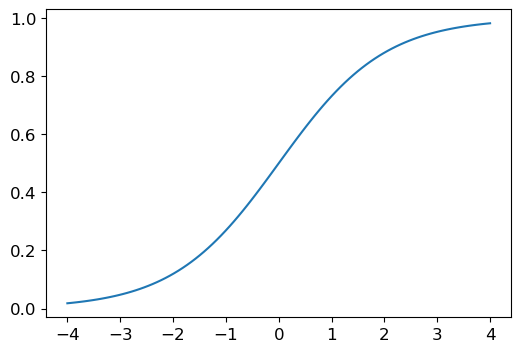

In [23]:
plot_function(torch.sigmoid, min=-4, max=4)

In [24]:
acts = torch.randn((6,2 ))*2
acts

tensor([[ 0.7376, -3.0817],
        [ 1.6731, -1.8628],
        [-0.2134, -0.6713],
        [-3.5899, -3.0074],
        [-0.8874, -0.2476],
        [-3.2425, -0.1462]])

In [25]:
acts.sigmoid()

tensor([[0.6765, 0.0439],
        [0.8420, 0.1344],
        [0.4468, 0.3382],
        [0.0269, 0.0471],
        [0.2916, 0.4384],
        [0.0376, 0.4635]])

In [26]:
(acts[:, 0]-acts[:,1]).sigmoid()

tensor([0.9785, 0.9717, 0.6125, 0.3583, 0.3453, 0.0433])

In [27]:
def softmax(x):
    return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [28]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.9785, 0.0215],
        [0.9717, 0.0283],
        [0.6125, 0.3875],
        [0.3583, 0.6417],
        [0.3453, 0.6547],
        [0.0433, 0.9567]])

In [29]:
def mnist_loss(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, 1-inputs, inputs).mean()

In [30]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [31]:
sm_acts

tensor([[0.9785, 0.0215],
        [0.9717, 0.0283],
        [0.6125, 0.3875],
        [0.3583, 0.6417],
        [0.3453, 0.6547],
        [0.0433, 0.9567]])

In [32]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.9785, 0.0283, 0.6125, 0.6417, 0.6547, 0.0433])

In [36]:
-sm_acts[idx, targ]

tensor([-0.9785, -0.0283, -0.6125, -0.6417, -0.6547, -0.0433])

In [37]:
F.nll_loss(sm_acts, targ, reduction="none")

tensor([-0.9785, -0.0283, -0.6125, -0.6417, -0.6547, -0.0433])

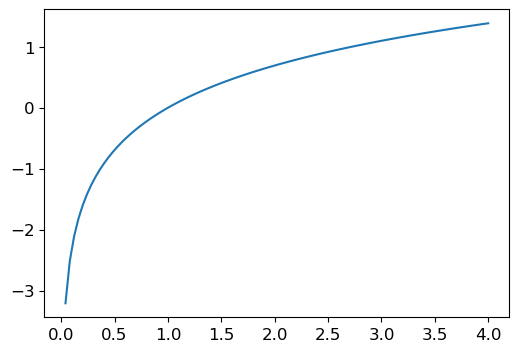

In [38]:
plot_function(torch.log, min=0, max=4)

In [39]:
y = b**a
a = log(y,b)

NameError: name 'b' is not defined

In [40]:
loss_func = nn.CrossEntropyLoss()

In [41]:
loss_func(acts, targ)

tensor(1.3474)

In [42]:
F.cross_entropy(acts, targ)

tensor(1.3474)

In [43]:
nn.CrossEntropyLoss(reduction="none")(acts, targ)

tensor([0.0217, 3.5646, 0.4902, 0.4437, 0.4236, 3.1406])

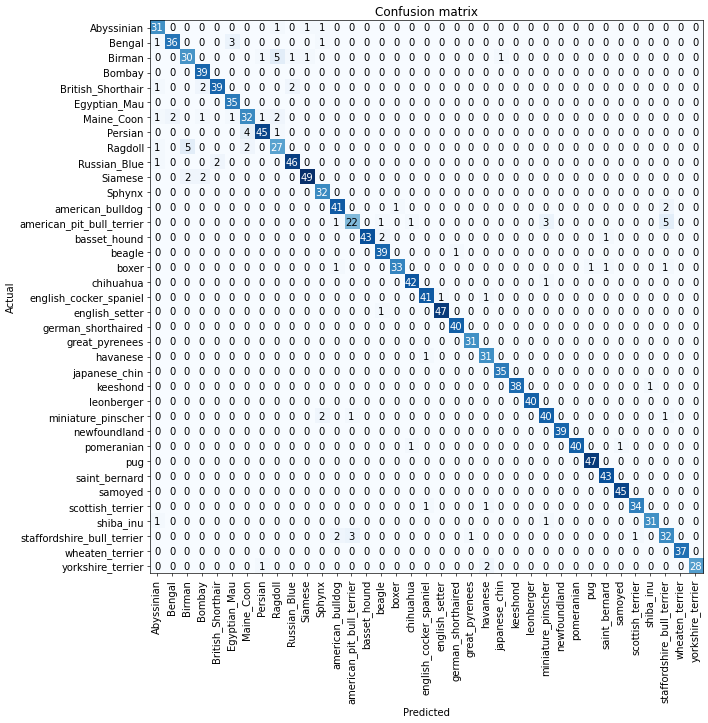

In [44]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [46]:
interp.most_confused(min_val=5)

[('Birman', 'Ragdoll', 5),
 ('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

In [49]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.779565,5.270155,0.500000,09:40


epoch,train_loss,valid_loss,error_rate,time
0,3.712806,2.078676,0.552097,12:10


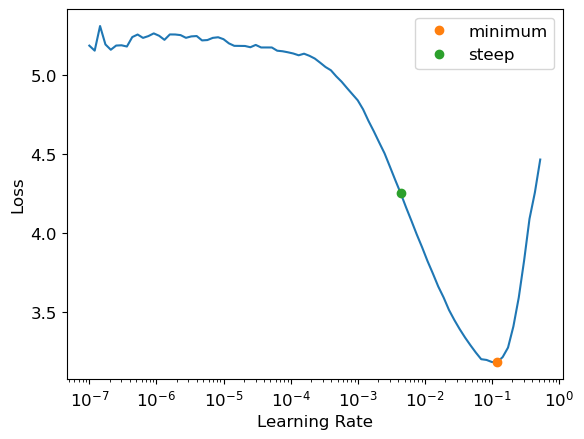

In [52]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [53]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.20e-02, steepest point: 4.37e-03


In [54]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.276419,0.324490,0.107578,09:37


epoch,train_loss,valid_loss,error_rate,time
0,0.556825,0.331800,0.104195,12:10
1,0.336038,0.218919,0.072395,12:11


In [55]:
learn.fine_tune??

In [56]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.104236,0.325332,0.103518,09:48
1,0.538732,0.259505,0.093369,09:43
2,0.323484,0.218529,0.077808,09:42


In [57]:
learn.unfreeze()

SuggestedLRs(valley=4.786300905834651e-06)

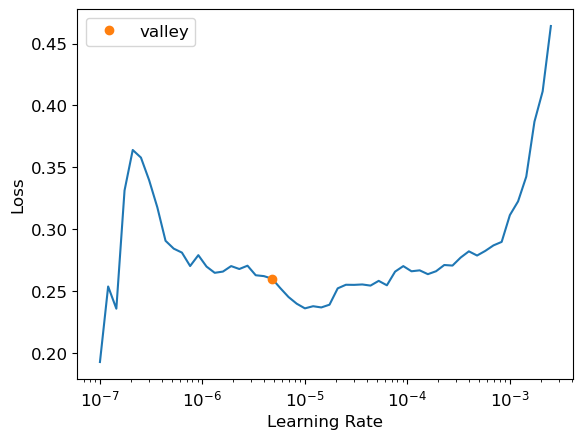

In [58]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.272201,0.208884,0.069689,12:26
1,0.234789,0.199381,0.068336,12:20


In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)